# 2024 OIBC Challenge
## (Deep Learning version skeleton 03)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
import os
from datetime import datetime, timedelta
from tqdm import tqdm

### 데이터 전처리

In [2]:
print(os.getcwd())  # 현재 작업 경로 출력

f:\For me\Project\24-OIBC-WolgoksTears\personal_files\hoon


actual_weather_1

In [3]:
# 데이터 불러오기
actual_weather_1 = pd.read_csv("../../data_files/actual_weather_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
actual_weather_1['datetime'] = pd.to_datetime(actual_weather_1['ts'], unit='s')
actual_weather_1['datetime'] = actual_weather_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열과 'location' 제거
actual_weather_1.drop(columns=['ts'], inplace=True)
actual_weather_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
actual_weather_1 = actual_weather_1.groupby(['datetime'], as_index=False).mean()


# weather_forecast에 없는 columns 제거
actual_weather_1.drop(columns=['real_feel_temp_shade'], inplace=True)
actual_weather_1.drop(columns=['pressure'], inplace=True)
actual_weather_1.drop(columns=['appr_temp'], inplace=True)
actual_weather_1.drop(columns=['wind_chill_temp'], inplace=True)
 
# 결과 확인
actual_weather_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-01 00:00:00,8.500000,8.000000,81.000000,5.500000,270.000000,6.100000,17.600000,0.0,20.900000,91.000000,579.000000,7.100000,0.100000
1,2024-03-01 01:00:00,7.158333,3.041667,72.666667,2.508333,234.666667,20.483333,26.366667,0.0,20.783333,97.750000,693.416667,5.091667,0.008333
2,2024-03-01 02:00:00,6.477778,2.111111,75.666667,2.433333,262.888889,21.944444,27.433333,0.0,20.033333,86.333333,616.222222,4.733333,0.011111
3,2024-03-01 03:00:00,6.045455,0.900000,74.545455,1.663636,213.000000,22.490909,27.645455,0.0,19.900000,62.818182,8692.363636,4.209091,0.136364
4,2024-03-01 04:00:00,5.430000,-0.090000,68.100000,-0.030000,256.800000,26.140000,42.440000,0.0,23.800000,38.100000,10911.800000,3.180000,0.410000


weather_forecast

In [4]:
# 데이터 불러오기
weather_forecast_1 = pd.read_csv("../../data_files/weather_forecast_1.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
weather_forecast_1['datetime'] = pd.to_datetime(weather_forecast_1['ts'], unit='s')
weather_forecast_1['datetime'] = weather_forecast_1['datetime'].dt.round('h') + timedelta(hours=9)

# 원래 'ts' 열 제거, 'base_ts' 열 제거, 'location' 제거
weather_forecast_1.drop(columns=['ts'], inplace=True)
weather_forecast_1.drop(columns=['base_ts'], inplace=True)
weather_forecast_1.drop(columns=['location'], inplace=True)

# 1시간 단위로 그룹화하여 평균을 계산 (location을 제외한 모든 열)
weather_forecast_1 = weather_forecast_1.groupby(['datetime'], as_index=False).mean()


# 예보 데이터의 columns 순서를 actual_weather columns 순서와 맞추기
weather_forecast_1 = weather_forecast_1[['datetime', 'temp', 'real_feel_temp', 'rel_hum',
       'dew_point', 'wind_dir', 'wind_spd', 'wind_gust_spd', 'uv_idx', 'vis',
       'cld_cvr', 'ceiling', 'wet_bulb_temp', 'total_liq']]
weather_forecast_1['precip_1h'] = weather_forecast_1['total_liq']
weather_forecast_1.drop(columns=['total_liq'], inplace=True)  

# 결과 확인
weather_forecast_1.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,cld_cvr,ceiling,wet_bulb_temp,precip_1h
0,2024-03-02 00:00:00,1.728394,-4.320987,64.333333,-4.320987,335.555556,22.048022,50.604944,0.0,16.093400,75.555556,1700.106667,-0.555556,0.000000
1,2024-03-02 01:00:00,1.851852,-4.506173,64.333333,-4.135800,335.000000,22.048022,50.640711,0.0,15.378140,84.777778,1249.680000,-0.432099,0.056444
2,2024-03-02 02:00:00,1.790123,-5.061728,66.333333,-3.950616,334.444444,22.656000,51.481144,0.0,14.392882,89.333333,1229.360000,-0.370370,0.197556
3,2024-03-02 03:00:00,1.604940,-5.308640,67.333333,-3.888887,333.777778,23.263967,51.463267,0.0,15.195758,94.555556,1933.786667,-0.370370,0.084667
4,2024-03-02 04:00:00,1.851852,-4.876541,66.444444,-3.950616,333.888889,23.871922,50.837400,0.0,15.825200,82.555556,2600.960000,-0.308642,0.000000


elec_supply

In [5]:
# 데이터 불러오기
elec_supply = pd.read_csv("../../data_files/elec_supply.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
elec_supply['datetime'] = pd.to_datetime(elec_supply['ts'], unit='s')
elec_supply['datetime'] = elec_supply['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
elec_supply = elec_supply.groupby(['datetime'], as_index=False).mean()

# 결과 확인
elec_supply.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
elec_supply.head()

,datetime,공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,2024-01-01 00:00:00,1.285000e+06,757500.000000,0.0,115593.233333,123350.666667,527166.666667,328500.000000
1,2024-01-01 01:00:00,1.238308e+06,727538.461538,0.0,68802.153846,77036.569231,510692.307692,312692.307692
2,2024-01-01 02:00:00,1.214818e+06,694090.909091,0.0,45923.181818,53740.109091,520727.272727,318545.454545
3,2024-01-01 03:00:00,1.207923e+06,672000.000000,0.0,38567.161538,46614.815385,536000.000000,291000.000000
4,2024-01-01 04:00:00,1.192364e+06,666000.000000,0.0,22849.272727,30575.990909,526363.636364,318272.727273


smp_da

In [6]:
# 데이터 불러오기
smp_da = pd.read_csv("../../data_files/smp_da.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_da['datetime'] = pd.to_datetime(smp_da['ts'], unit='s') + timedelta(hours=9)

# 결과 확인
smp_da.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_da.head()

,하루전가격(원/kWh),datetime
0,107.39,2024-03-01 00:00:00
1,107.39,2024-03-01 01:00:00
2,95.30,2024-03-01 02:00:00
3,87.89,2024-03-01 03:00:00
4,0.00,2024-03-01 04:00:00


smp_rt_rc

In [7]:
# 데이터 불러오기
smp_rt_rc = pd.read_csv("../../data_files/smp_rt_rc.csv")

# 'ts'를 datetime 형식으로 변환 후 1시간 단위로 맞추기
smp_rt_rc['datetime'] = pd.to_datetime(smp_rt_rc['ts'], unit='s')
smp_rt_rc['datetime'] = smp_rt_rc['datetime'].dt.round('h') + timedelta(hours=9)

# 1시간 단위로 그룹화하여 평균을 계산
smp_rt_rc = smp_rt_rc.groupby(['datetime'], as_index=False).mean()

# 결과 확인
smp_rt_rc.drop(columns=['ts'], inplace=True)  # 원래 'ts' 열 제거
smp_rt_rc.head()

,datetime,실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh)
0,2024-03-01 00:00:00,133.125,133.125
1,2024-03-01 01:00:00,115.160,115.160
2,2024-03-01 02:00:00,92.830,92.830
3,2024-03-01 03:00:00,87.334,87.334
4,2024-03-01 04:00:00,87.260,87.260


##### X 데이터

- 제주 기상 실측 (n+1)
- 하루 전 시장 전기 예측 (n)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [8]:
actual_weather_1
weather_forecast_1['datetime']
smp_da_x = smp_da.copy()
smp_da_x['datetime'] += pd.Timedelta(days=1)
smp_rt_rc['datetime'] += pd.Timedelta(days=2)
elec_supply['datetime'] += pd.Timedelta(days=2)

In [9]:
dfs = [actual_weather_1, smp_da_x, smp_rt_rc, elec_supply]

X = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='outer'), dfs)

In [10]:
X.head()

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,하루전가격(원/kWh),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
0,2024-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.285000e+06,757500.000000,0.0,115593.233333,123350.666667,527166.666667,328500.000000
1,2024-01-03 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.238308e+06,727538.461538,0.0,68802.153846,77036.569231,510692.307692,312692.307692
2,2024-01-03 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.214818e+06,694090.909091,0.0,45923.181818,53740.109091,520727.272727,318545.454545
3,2024-01-03 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.207923e+06,672000.000000,0.0,38567.161538,46614.815385,536000.000000,291000.000000
4,2024-01-03 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.192364e+06,666000.000000,0.0,22849.272727,30575.990909,526363.636364,318272.727273


##### Y 데이터

- 하루 전 시장 전기 예측 가격(n+1)

In [10]:
Y = smp_da

### 파이토치 모델 구성

##### 하이퍼 파라미터

In [11]:
hidden_size = 128  # Hidden state size, you can choose other values too

learning_rate = 0.001
epoches=100

##### 날짜 설정

In [12]:
target_date = {
  # 최소 2024-03-04
  "train_start_date": '2024-03-03',
  # 최대 2024-10-22
  "train_end_date": '2024-10-22',
}

In [13]:
X = X.loc[
  (X['datetime'] > target_date['train_start_date']) &
  (X['datetime'] <= target_date['train_end_date'])
]

In [14]:
Y = Y.loc[
  (Y['datetime'] > target_date['train_start_date']) &
  (Y['datetime'] <= target_date['train_end_date'])
]

In [15]:
from datetime import datetime, timedelta

targ = datetime.strptime(target_date['train_start_date'], '%Y-%m-%d') + timedelta(hours=1)
endd = datetime.strptime(target_date['train_end_date'], '%Y-%m-%d')

print(targ, endd)

2024-03-03 01:00:00 2024-10-22 00:00:00


In [16]:
# X 데이터의 특정 시간이 누락되었기 때문에
# Y 데이터에서도 누락된 시간대를 제거한다.

while targ <= endd:
  if not len(X.loc[X['datetime'] == targ]):
    idx = Y[Y['datetime'] == targ].index
    Y.drop(idx, inplace=True)
  
  targ = targ + timedelta(hours=1)

In [17]:
len(X), len(Y)

(5592, 5592)

##### 모듈 임포트

In [18]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.preprocessing import MinMaxScaler

In [19]:
if torch.cuda.is_available():
  print(torch.cuda.get_device_name())
  print(torch.__version__)
  print(torch.version.cuda)
  x = torch.randn(1).cuda()
  print(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

NVIDIA GeForce GTX 1650
2.5.0+cu118
11.8
tensor([-1.8078], device='cuda:0')


device(type='cuda', index=0)

##### Dataset 구성

In [20]:
class ElecDataset(Dataset):
  def __init__(self, x_data, y_data):
    scaler = MinMaxScaler()

    columns_to_scale = x_data.columns[1:]
    x_data[columns_to_scale] = scaler.fit_transform(x_data[columns_to_scale])
    
    self.x_data = x_data.fillna(0)
    self.y_data = y_data.fillna(0)

  def __getitem__(self, index):
    length = 24
    target_y = self.y_data['하루전가격(원/kWh)'].iloc[index*length:(index+1)*length].to_numpy()
    targets = self.x_data.drop(columns='datetime').iloc[index*length:(index+1)*length].to_numpy()
    return torch.from_numpy(targets), torch.from_numpy(target_y)

  def __len__(self):
    return int(len(self.y_data) / 24)

In [21]:
dataset = ElecDataset(X, Y)

In [22]:
len(dataset)

233

##### dataloader 구성

In [23]:
dataloader = DataLoader(dataset=dataset,
                        batch_size=8,
                        # 데이터의 순서가 중요해서 shuffle하면 안될 듯, 그래도 해보자
                        shuffle=True,
                        drop_last=False)

##### 모델 구성

In [24]:
class LSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(LSTMModel, self).__init__()
    self.hidden_size = hidden_size
    
    # Define the LSTM layer
    self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout1 = nn.Dropout(0.2)

    self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout2 = nn.Dropout(0.2)

    self.lstm3 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)

    self.dropout3 = nn.Dropout(0.2)

    self.lstm4 = nn.LSTM(hidden_size, hidden_size, num_layers=1, batch_first=True, dtype=torch.float64)
    
    # Define a fully connected layer to produce output of size 24
    self.fc1 = nn.Linear(hidden_size, output_size, dtype=torch.float64)

    # self.relu = nn.ReLU()

    # self.dropout4 = nn.Dropout(0.2)

    # self.fc2 = nn.Linear(hidden_size, output_size, dtype=torch.float64)
  
  def forward(self, x):
    # Set initial hidden and cell states to zeros
    h0_1 = torch.zeros(1, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # hidden state
    c0_1 = torch.zeros(1, x.size(0), self.hidden_size, dtype=torch.float64).to(x.device)  # cell state
    
    # LSTM1
    out, _ = self.lstm1(x, (h0_1, c0_1))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.
    
    out = self.dropout1(out)

    # Set initial hidden and cell states to zeros
    h0_2 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_2 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM2
    out, _ = self.lstm2(out, (h0_2, c0_2))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.

    out = self.dropout2(out)

    # Set initial hidden and cell states to zeros
    h0_3 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_3 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM3
    out, _ = self.lstm3(out, (h0_3, c0_3))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.

    out = self.dropout3(out)

    # Set initial hidden and cell states to zeros
    h0_4 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # hidden state
    c0_4 = torch.zeros(1, out.size(0), self.hidden_size, dtype=torch.float64).to(out.device)  # cell state
    
    # LSTM3
    out, _ = self.lstm4(out, (h0_4, c0_4))  # out의 shape은 (batch_size, seq_length, hidden_size)입니다.
    
    # 모든 타임스텝에 대해 최종 출력 처리
    out = self.fc1(out[:, -1, :])  # 각 배치에 대해 마지막 타임스텝의 출력만 취함, out의 shape은 (batch_size, hidden_size)로 설정됩니다.

    # out = self.relu(out)

    # out = self.dropout4(out)

    # out = self.fc2(out)
    
    return out

In [25]:
def customloss(predict, y):#학습용

    e1 = torch.zeros_like(y)
    e2 = torch.zeros_like(y)
    accuracy = torch.zeros_like(y, dtype=torch.bool)

    positive_mask = y > 0
    negative_mask = y <= 0

    e1_mask = y > 0  # y > 0인 부분 마스크
    e2_mask = y < -1  # y <= 0인 부분 마스크
    e2_adjusted_mask = (y <= 0) & (y >= -1)
    # 각 마스크 조건에 맞는 부분에 대해서만 e1, e2를 계산합니다.
    # e1과 e2에서 분모에 작은 상수를 추가하여 0으로 나누는 것을 방지
    e1[e1_mask] = torch.abs((y[e1_mask] - predict[e1_mask]) / (y[e1_mask]))
    e2[e2_mask] = torch.abs((y[e2_mask] - predict[e2_mask]) / (-y[e2_mask]))
    e2[e2_adjusted_mask] = torch.abs((y[e2_adjusted_mask] - predict[e2_adjusted_mask]) / (-1))

    accuracy[positive_mask] = (predict[positive_mask] > 0)
    accuracy[negative_mask] = (predict[negative_mask] <= 0)

    e1_mean = e1[e1 != 0].mean() if (e1 != 0).any() else torch.tensor(0.0)
    e2_mean = e2[e2 != 0].mean() if (e2 != 0).any() else torch.tensor(0.0)

    accuracy_mean = accuracy.float().mean()

    e_F = 0.2 * e1_mean + 0.8 * e2_mean - (accuracy_mean - 0.95)
    if e_F<0:
      e_F=0
    e_F_square = e_F**2
    mse_loss = torch.mean((y - predict)**2)

    return e_F_square*0.1+mse_loss

In [26]:
input_size = len(X.columns) - 1  # Number of input features
output_size = 24  # Single output


model = LSTMModel(input_size, hidden_size, output_size)


criterion = customloss # nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

##### 학습

In [27]:
def train(model, train_loader, criterion, optimizer, num_epochs, device):
    model = model.to(device)  # Move model to GPU/CPU

    train_history = []
    
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        
        running_loss = 0.0  # To keep track of loss
        for inputs, targets in tqdm(train_loader, ncols=100):
            # Move data to the same device as the model
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(inputs)

            loss = criterion(outputs, targets)

            # Backward pass and optimization
            optimizer.zero_grad()  # Clear the gradients
            loss.backward()        # Compute gradients
            # torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()        # Update model parameters

            running_loss += loss.item()
            
            # print(loss.item())

        # Print the loss after each epoch
        avg_loss = running_loss / len(train_loader)
        train_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    print("Training complete.")
    return model, train_history

In [28]:
model, train_history = train(model, dataloader, criterion, optimizer, epoches, device)

  0%|                                                                        | 0/30 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 24.56it/s]


Epoch [1/100], Loss: 17985.5179


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.98it/s]


Epoch [2/100], Loss: 16565.0072


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.48it/s]


Epoch [3/100], Loss: 15546.2141


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.49it/s]


Epoch [4/100], Loss: 14536.4419


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.69it/s]


Epoch [5/100], Loss: 13845.5778


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.01it/s]


Epoch [6/100], Loss: 13122.1740


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.73it/s]


Epoch [7/100], Loss: 12334.6309


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.97it/s]


Epoch [8/100], Loss: 11689.5264


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.59it/s]


Epoch [9/100], Loss: 11057.8845


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.85it/s]


Epoch [10/100], Loss: 10307.1684


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.16it/s]


Epoch [11/100], Loss: 9748.9049


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.54it/s]


Epoch [12/100], Loss: 9172.1385


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.15it/s]


Epoch [13/100], Loss: 8544.6884


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.69it/s]


Epoch [14/100], Loss: 8108.4670


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.87it/s]


Epoch [15/100], Loss: 7553.1257


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.33it/s]


Epoch [16/100], Loss: 7258.7609


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.68it/s]


Epoch [17/100], Loss: 6880.5188


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.61it/s]


Epoch [18/100], Loss: 6518.0040


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.94it/s]


Epoch [19/100], Loss: 6100.7795


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.86it/s]


Epoch [20/100], Loss: 5844.4337


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.16it/s]


Epoch [21/100], Loss: 5415.6257


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.99it/s]


Epoch [22/100], Loss: 5153.6745


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.57it/s]


Epoch [23/100], Loss: 4893.9071


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.08it/s]


Epoch [24/100], Loss: 4602.9703


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.75it/s]


Epoch [25/100], Loss: 4354.5290


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.47it/s]


Epoch [26/100], Loss: 4169.1004


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.71it/s]


Epoch [27/100], Loss: 4083.4207


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.34it/s]


Epoch [28/100], Loss: 3829.7843


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.16it/s]


Epoch [29/100], Loss: 3690.8791


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.16it/s]


Epoch [30/100], Loss: 3451.9080


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.26it/s]


Epoch [31/100], Loss: 3325.6214


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.92it/s]


Epoch [32/100], Loss: 3303.1897


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.23it/s]


Epoch [33/100], Loss: 3069.3998


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.26it/s]


Epoch [34/100], Loss: 2985.3856


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.40it/s]


Epoch [35/100], Loss: 2874.8993


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.31it/s]


Epoch [36/100], Loss: 2934.9156


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.33it/s]


Epoch [37/100], Loss: 2761.5285


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.99it/s]


Epoch [38/100], Loss: 2577.0280


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.46it/s]


Epoch [39/100], Loss: 2620.2999


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.28it/s]


Epoch [40/100], Loss: 2472.4341


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.17it/s]


Epoch [41/100], Loss: 2398.8198


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.64it/s]


Epoch [42/100], Loss: 2333.4939


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.58it/s]


Epoch [43/100], Loss: 2312.3901


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.54it/s]


Epoch [44/100], Loss: 2226.6566


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.69it/s]


Epoch [45/100], Loss: 2206.0465


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.56it/s]


Epoch [46/100], Loss: 2186.4897


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.62it/s]


Epoch [47/100], Loss: 2116.9911


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.73it/s]


Epoch [48/100], Loss: 2105.3587


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.69it/s]


Epoch [49/100], Loss: 2074.5848


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.64it/s]


Epoch [50/100], Loss: 2041.9408


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.27it/s]


Epoch [51/100], Loss: 2109.1197


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.20it/s]


Epoch [52/100], Loss: 2014.5137


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.58it/s]


Epoch [53/100], Loss: 2000.7988


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.19it/s]


Epoch [54/100], Loss: 2036.9575


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.81it/s]


Epoch [55/100], Loss: 1940.9425


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.95it/s]


Epoch [56/100], Loss: 1931.4584


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.27it/s]


Epoch [57/100], Loss: 1964.6611


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.93it/s]


Epoch [58/100], Loss: 1960.0880


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.97it/s]


Epoch [59/100], Loss: 2106.8326


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.17it/s]


Epoch [60/100], Loss: 1910.1885


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.79it/s]


Epoch [61/100], Loss: 1979.9753


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.80it/s]


Epoch [62/100], Loss: 1945.5446


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.20it/s]


Epoch [63/100], Loss: 1884.6156


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.50it/s]


Epoch [64/100], Loss: 2101.1684


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.25it/s]


Epoch [65/100], Loss: 1902.6543


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.96it/s]


Epoch [66/100], Loss: 1945.5651


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.72it/s]


Epoch [67/100], Loss: 1918.3471


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.22it/s]


Epoch [68/100], Loss: 1914.6485


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.38it/s]


Epoch [69/100], Loss: 1869.3922


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.79it/s]


Epoch [70/100], Loss: 1918.6355


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.66it/s]


Epoch [71/100], Loss: 1878.0657


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.14it/s]


Epoch [72/100], Loss: 2036.8876


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.12it/s]


Epoch [73/100], Loss: 1876.9401


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.38it/s]


Epoch [74/100], Loss: 2158.8425


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.28it/s]


Epoch [75/100], Loss: 2074.5770


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.56it/s]


Epoch [76/100], Loss: 1936.3980


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.78it/s]


Epoch [77/100], Loss: 1921.8726


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.70it/s]


Epoch [78/100], Loss: 1908.5641


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.86it/s]


Epoch [79/100], Loss: 1895.5608


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.87it/s]


Epoch [80/100], Loss: 1898.7124


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.48it/s]


Epoch [81/100], Loss: 1874.4198


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.97it/s]


Epoch [82/100], Loss: 1863.9951


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.62it/s]


Epoch [83/100], Loss: 2009.3388


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.49it/s]


Epoch [84/100], Loss: 1902.7594


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.24it/s]


Epoch [85/100], Loss: 1928.7524


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.03it/s]


Epoch [86/100], Loss: 1840.0947


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.62it/s]


Epoch [87/100], Loss: 1861.5390


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.89it/s]


Epoch [88/100], Loss: 1978.5252


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.70it/s]


Epoch [89/100], Loss: 1997.7691


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.73it/s]


Epoch [90/100], Loss: 1995.9722


100%|███████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.87it/s]


Epoch [91/100], Loss: 1906.7770


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.24it/s]


Epoch [92/100], Loss: 1867.3022


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.09it/s]


Epoch [93/100], Loss: 1916.9650


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.58it/s]


Epoch [94/100], Loss: 1893.5515


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.65it/s]


Epoch [95/100], Loss: 1922.1654


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.49it/s]


Epoch [96/100], Loss: 2162.5505


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.52it/s]


Epoch [97/100], Loss: 1893.7427


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.33it/s]


Epoch [98/100], Loss: 1850.6317


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.36it/s]


Epoch [99/100], Loss: 1908.6262


100%|███████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.94it/s]

Epoch [100/100], Loss: 1923.6640
Training complete.


학습 loss

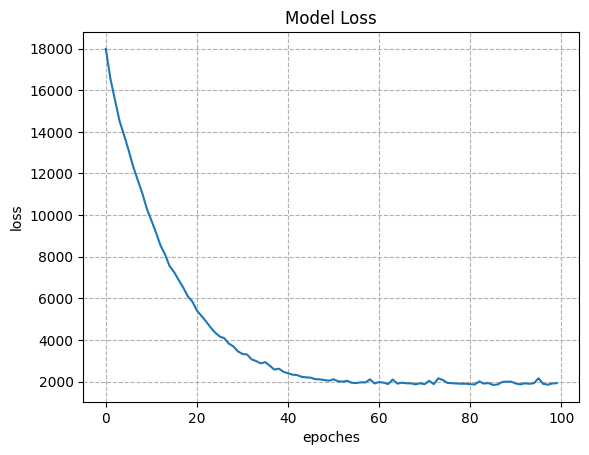

In [29]:
plt.plot(train_history)

plt.title('Model Loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.grid(True, linestyle='--')

plt.show()

In [30]:
torch.save(model.state_dict(), 'model3.pth')

### 예측

In [40]:
test_target_date = {
  # 최소 2024-10-25
  "start_date": '2024-10-25',
  # 최대 2024-11-07
  "end_date": '2024-11-07',
}

predict_target_date = '2024-11-06'

##### 모델 불러오기

In [41]:
model_test = LSTMModel(input_size, hidden_size, output_size)

model_test.to(device)

model_test.load_state_dict(torch.load('model3.pth'))

C:\Users\ldh75\AppData\Local\Temp\ipykernel_37732\643798106.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_test.load_state_dict(torch.load('model3.pth'))


<All keys matched successfully>

##### X 데이터

- 제주 기상 예측 (n+1)
- 제주 전력 시장 실시간 (n-1)
- 제주 전력 시장 현황 (n-1)

In [42]:
dfs = [weather_forecast_1, smp_da_x, smp_rt_rc, elec_supply]

test_data = reduce(lambda left, right: pd.merge(left, right, on='datetime', how='inner'), dfs)

target_day = datetime.strptime(predict_target_date, '%Y-%m-%d')

target_data = test_data.loc[
  (test_data['datetime'] > target_day) &
  (test_data['datetime'] <= target_day + timedelta(days=1))
]

test_data = test_data.loc[
  (test_data['datetime'] > datetime.strptime(test_target_date['start_date'], '%Y-%m-%d')) &
  (test_data['datetime'] <= datetime.strptime(test_target_date['end_date'], '%Y-%m-%d') + timedelta(days=1))
]

In [43]:
test_data

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,하루전가격(원/kWh),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5601,2024-10-25 01:00:00,18.271589,16.543222,65.777778,11.790110,73.222222,15.664311,25.731622,0.0,16.0934,...,92.57,97.078000,97.078000,1.242000e+06,552615.384615,0.000000,236260.076923,244775.846154,684384.615385,223846.153846
5602,2024-10-25 02:00:00,18.456789,16.728389,68.777778,12.592600,70.888889,15.449733,26.357467,0.0,16.0934,...,204.70,133.896667,133.896667,1.240000e+06,524181.818182,0.000000,236084.090909,244635.090909,710818.181818,217181.818182
5603,2024-10-25 03:00:00,18.950611,17.098756,70.888889,13.395044,68.666667,15.664311,27.376733,0.0,16.0934,...,0.00,122.590000,122.590000,1.228769e+06,509769.230769,0.000000,248816.769231,257309.923077,714230.769231,210846.153846
5604,2024-10-25 04:00:00,18.950611,17.222222,72.555556,13.888878,67.111111,15.664311,27.573433,0.0,16.0934,...,0.00,30.783333,30.783333,1.223909e+06,502545.454545,0.000000,244287.363636,252679.909091,716454.545455,212363.636364
5605,2024-10-25 05:00:00,19.135778,17.407422,74.000000,14.444433,65.888889,16.093467,28.431744,0.0,16.0934,...,0.00,0.000000,0.000000,1.222077e+06,504923.076923,0.000000,239023.153846,247333.615385,703769.230769,208230.769231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932,2024-11-07 20:00:00,15.370378,15.493833,72.333333,10.432126,102.000000,5.793637,13.822498,0.0,16.0934,...,117.52,127.580000,127.580000,1.244889e+06,705000.000000,6775.994444,303707.222222,310726.888889,540111.111111,366888.888889
5933,2024-11-07 21:00:00,15.493844,15.308656,73.222222,10.802470,105.555556,7.438751,16.272251,0.0,16.0934,...,117.53,119.556000,119.556000,1.236917e+06,670750.000000,4554.705833,298021.500000,302820.333333,566166.666667,391166.666667
5934,2024-11-07 22:00:00,15.123444,14.876556,77.333333,11.111110,111.666667,7.027472,16.272253,0.0,16.0934,...,113.81,106.686667,106.686667,1.243364e+06,648818.181818,1637.663636,306868.272727,308800.000000,594727.272727,407818.181818
5935,2024-11-07 23:00:00,15.493833,15.246944,77.111111,11.543210,117.111111,7.027472,16.683544,0.0,16.0934,...,113.61,105.064000,105.064000,1.223077e+06,625307.692308,0.000000,288086.538462,288662.615385,597615.384615,410384.615385


In [44]:
target_data

,datetime,temp,real_feel_temp,rel_hum,dew_point,wind_dir,wind_spd,wind_gust_spd,uv_idx,vis,...,하루전가격(원/kWh),실시간 임시 가격(원/kWh),실시간 확정 가격(원/kWh),공급능력(kW),현재 수요(kW),태양광 발전량kW),풍력 발전량(kW),신재생 발전량 총합(kW),공급 예비력(kW),운영 예비력(kW)
5889,2024-11-06 01:00:00,12.222216,8.580243,63.777778,5.555557,83.555556,23.496410,40.770044,0.000000,16.0934,...,103.72,97.400000,97.400000,1.032077e+06,497000.000000,0.000000,614.893000,908.781846,484692.307692,263769.230769
5890,2024-11-06 02:00:00,12.037027,8.209879,64.555556,5.493828,83.888889,23.710999,42.200578,0.000000,16.0934,...,92.74,87.493333,87.493333,1.032273e+06,472363.636364,0.000000,279.042545,660.190636,509636.363636,263090.909091
5891,2024-11-06 03:00:00,11.728404,7.716048,65.777778,5.493828,84.333333,24.318967,43.863567,0.000000,16.0934,...,87.46,87.232000,87.232000,1.033000e+06,455923.076923,0.000000,359.823769,739.888923,526692.307692,280307.692308
5892,2024-11-06 04:00:00,11.851849,7.777776,65.777778,5.617286,85.333333,25.534900,46.295478,0.000000,16.0934,...,87.49,87.056667,87.056667,1.033000e+06,449818.181818,0.000000,395.955182,753.233091,532909.090909,286636.363636
5893,2024-11-06 05:00:00,12.283944,8.086418,65.333333,5.864200,86.555556,26.357464,48.566444,0.000000,16.0934,...,0.00,93.358000,93.358000,1.032538e+06,456923.076923,0.000000,424.759769,579.875692,525538.461538,317230.769231
5894,2024-11-06 06:00:00,12.530867,8.271609,65.000000,6.172839,87.888889,27.805889,51.463267,0.000000,16.0934,...,0.00,103.040000,103.040000,1.033182e+06,485909.090909,0.000000,1130.962182,1256.141364,497090.909091,374727.272727
5895,2024-11-06 07:00:00,12.592600,8.271609,65.555556,6.296296,201.111111,28.628433,53.716356,0.000000,16.0934,...,104.21,108.796000,108.796000,1.068308e+06,517923.076923,817.756154,634.594462,1659.884692,500230.769231,377461.538462
5896,2024-11-06 08:00:00,12.901233,8.950614,64.666667,6.358027,202.222222,30.058956,55.772744,0.666667,16.0934,...,106.62,120.953333,120.953333,1.117000e+06,528636.363636,35087.402727,1179.212818,36390.738182,544454.545455,415727.272727
5897,2024-11-06 09:00:00,13.580233,9.938277,61.444444,6.419756,203.222222,31.918644,57.811233,1.333333,16.0934,...,117.37,136.718000,136.778000,1.204154e+06,545692.307692,126945.684615,417.556692,127487.646154,638692.307692,438461.538462
5898,2024-11-06 10:00:00,14.691356,11.851853,57.666667,6.358027,164.888889,30.058956,55.379333,2.111111,16.0934,...,136.94,145.696667,145.696667,1.278727e+06,554272.727273,205438.181818,516.134182,206078.272727,707363.636364,448181.818182


In [45]:
predict_set = ElecDataset(target_data, Y.iloc[:24])

predict_dataloader = DataLoader(dataset=predict_set,
                        batch_size=24,
                        shuffle=False)

In [46]:
model_test.eval()

with torch.no_grad():
  for inputs, _ in predict_dataloader:
    inputs = inputs.to(device)
    predictions = model_test(inputs)

print(predictions)

tensor([[128.1548, 114.0070, 110.0107, 106.3236, 106.9076, 107.0738, 118.8551,
         127.2603, 128.2415, 120.8964, 117.4313, 104.1623,  91.7296, 107.7341,
         122.7560, 128.7692, 139.7040, 146.4675, 153.8685, 155.0517, 152.1740,
         148.1100, 143.4054, 137.2761]], device='cuda:0', dtype=torch.float64)


In [47]:
flattened_list = predictions.view(-1).tolist()

print(flattened_list)

[128.15475794462466, 114.00704516864356, 110.0106508030151, 106.32360037066947, 106.9076155545259, 107.07380459271502, 118.85509728785425, 127.2603138692322, 128.2414604307524, 120.89644457251973, 117.43131451114351, 104.16227705832007, 91.72955040092714, 107.73414745734995, 122.75602739641928, 128.76915010335995, 139.70404944932653, 146.4675220993719, 153.86854449460492, 155.05169913343505, 152.1740022839986, 148.1099531420563, 143.40544808063046, 137.27606899578095]


##### 분석

예측결과

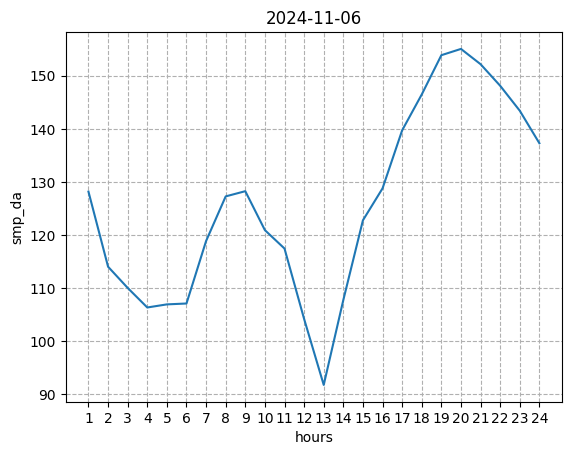

In [48]:
plt.plot(list(range(1, 25)), flattened_list)

plt.title(predict_target_date)
plt.xlabel('hours')
plt.ylabel('smp_da')
plt.xticks(list(range(1,25, 1)))
plt.grid(True, linestyle='--')

plt.show()